In [7]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

In [44]:
import pickle

synplanner_clusters = pickle.load(open("synplanner_cluster.pkl", "rb"))
askcos_clusters = pickle.load(open("askcos_clusters.pkl", "rb"))
aizynth_clusters = pickle.load(open("aizynth_clusters.pkl", "rb"))

In [31]:
synplanner_sb_cgrs = {str(cluster['sb_cgr']) for cluster in synplanner_cluster.values()}
askcos_sb_cgrs = {str(cluster['sb_cgr']) for cluster in askcos_clusters.values()}
aizynth_sb_cgrs = {str(cluster['sb_cgr']) for cluster in aizynth_clusters.values()}

In [32]:
synplanner_sb_cgrs

{'C1CCCC1(C#N)c2ccc(cc2)[.>-]N[.>-]C(=O)c3cccnc3[.>-]NCc4ccncc4',
 'C1CCCC1(C#N)c2ccc(cc2)[.>-]N[.>-]C(c3cccnc3N[.>-]Cc4ccncc4)=O',
 'C1CCCC1(C#N)c2ccc(cc2)[.>-]N[.>-]C(c3cccnc3N[.>-]Cc4ccncc4)[.>=]O',
 'C1CCCC1(c2ccc(cc2)N[.>-]C(=O)c3cccnc3[.>-]NCc4ccncc4)C#N',
 'C1CCCC1(c2ccc(cc2)N[.>-]C(c3c(nccc3)NCc4ccncc4)[.>=]O)C#N',
 'C1CCCC1(c2ccc(cc2)N[.>-]C(c3c(nccc3)N[.>-]Cc4ccncc4)=O)C#N',
 'C1CC[.>-]C([.>-]C1)(C[.>#]N)c2ccc(cc2)[.>-]NC(c3cccnc3[.>-]NCc4ccncc4)=O',
 'C1CC[.>-]C([.>-]C1)(c2ccc(cc2)[.>-]NC(c3cccnc3[.>-]NCc4ccncc4)=O)[.>-]C#N',
 'C[.>-]1CCC[.>-]C[.>-]1(c2ccc(cc2)N[.>-]C(=O)c3cccnc3[.>-]NCc4ccncc4)C[.>#]N',
 'c1cc(ccc1C2(CCCC2)C#N)N[.>-]C(=O)[.>-]c3c(nccc3)N[.>-]Cc4ccncc4',
 'c1cc(ccc1C2(CCCC2)C#N)[.>-]NC(c3cccnc3NCc4ccncc4)[.>=]O',
 'c1cc(ccc1C[.>-]2([.>-]CCCC[.>-]2)C#N)N[.>-]C([.>=]O)c3c(nccc3)[.>-]NCc4ccncc4',
 'c1cc(ccc1C[.>-]2([.>-]CCCC[.>-]2)C#N)[.>-]NC(c3cccnc3[.>-]NCc4ccncc4)=O',
 'c1cc(ccc1N[.>-]C(=O)c2cccnc2[.>-]NCc3ccncc3)C[.>-]4([.>-]CCCC[.>-]4)C#N',
 'c1cc(ccc1N[.>

### Wenn diagram of overlap SB-CGR of routes in all tools

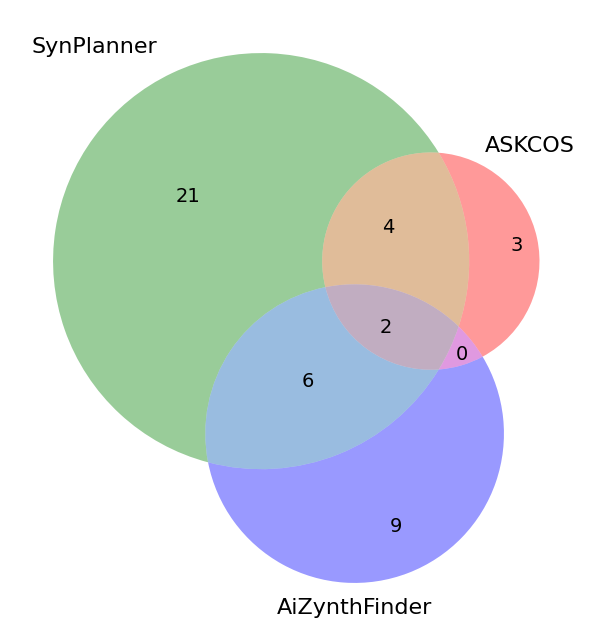

In [33]:
# Plot Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([synplanner_sb_cgrs, askcos_sb_cgrs, aizynth_sb_cgrs], ('SynPlanner', 'ASKCOS', 'AiZynthFinder'), set_colors =('g', 'r', 'b'),)
# plt.title('Overlap of SB-CGRs Across Planners')

# Increase font size for the subset labels (numbers)
for text in venn.subset_labels:
    if text: # Check if the text object exists
        text.set_fontsize(14) # Adjust the font size as needed

# Increase font size for the set labels (SynPlanner, ASKCOS, AiZynthFinder)
for text in venn.set_labels:
    if text: # Check if the text object exists
        text.set_fontsize(16) # Adjust the font size as needed

plt.show()


In [34]:
syn = synplanner_sb_cgrs
ask = askcos_sb_cgrs
ai = aizynth_sb_cgrs

In [48]:
import pandas as pd

# Compute overlaps
only_syn = syn - ask - ai
only_ask = ask - syn - ai
only_ai = ai - syn - ask

syn_ask = (syn & ask) - ai
syn_ai = (syn & ai) - ask
ask_ai = (ask & ai) - syn

all_three = syn & ask & ai

# Organize into a DataFrame
regions = {
    'Only SynPlanner': only_syn,
    'Only ASKCOS': only_ask,
    'Only AiZynthFinder': only_ai,
    'SynPlanner ∩ ASKCOS': syn_ask,
    'SynPlanner ∩ AiZynthFinder': syn_ai,
    'ASKCOS ∩ AiZynthFinder': ask_ai,
    'All Three': all_three
}

df = pd.DataFrame({
    'Region': list(regions.keys()),
    'Count': [len(v) for v in regions.values()],
    'Examples': [list(v) for v in regions.values()]
})

In [50]:
df

,Region,Count,Examples
0,Only SynPlanner,21,[c1cnccc1C[.>-]N[.>-]c2c(C(=O)N[.>-]c3ccc(cc3)...
1,Only ASKCOS,3,[c1cnccc1CN[.>-]c2ncccc2[.>-]C([.>-]Nc3ccc(cc3...
2,Only AiZynthFinder,9,[c1cc(ccc1N[.>-]C(=O)c2cccnc2[.>-]NCc3ccncc3)[...
3,SynPlanner ∩ ASKCOS,4,[c1cc(ccc1C2(CCCC2)C#N)N[.>-]C(=O)[.>-]c3c(ncc...
4,SynPlanner ∩ AiZynthFinder,6,[c1cc(ccc1N[.>-]C(c2c([.>-]N[.>-]Cc3ccncc3)ncc...
5,ASKCOS ∩ AiZynthFinder,0,[]
6,All Three,2,[C1CCCC1(c2ccc(cc2)N[.>-]C(=O)c3cccnc3[.>-]NCc...


### Strategic bond number histogram

In [41]:
def compute_group_percentages(clusters):
    """
    Given a dict mapping cluster IDs (e.g. '2.1') to cluster data containing 'group_size',
    returns a dict mapping the integer prefix (e.g. 2) to the percentage of the total group_size.
    """
    # Sum sizes by prefix
    prefix_sums = {}
    for cid, data in clusters.items():
        prefix = int(cid.split('.')[0])
        size = data.get('group_size', 0)
        prefix_sums[prefix] = prefix_sums.get(prefix, 0) + size

    # Compute total
    total = sum(prefix_sums.values())
    if total == 0:
        return {prefix: 0.0 for prefix in prefix_sums}

    # Calculate percentages
    return {
        prefix: round((size / total) * 100, 2)
        for prefix, size in prefix_sums.items()
    }

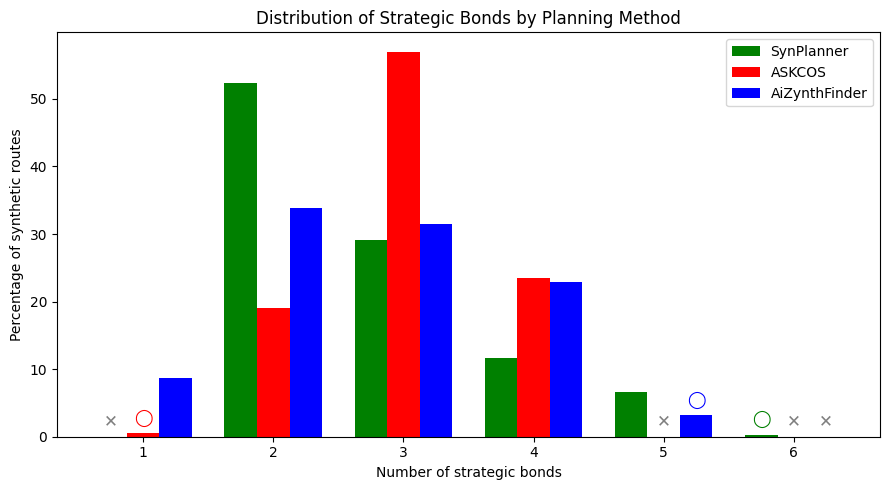

In [ ]:

# Data
synplanner = compute_group_percentages(synplanner_clusters)
askcos =  compute_group_percentages(askcos_clusters)
aizynth = compute_group_percentages(aizynth_clusters)

# All bond counts
x_labels = sorted(set(synplanner) | set(askcos) | set(aizynth))
x = range(len(x_labels))
width = 0.25

# Y values aligned to x_labels; track presence
data = {
    'SynPlanner': (synplanner, [synplanner.get(k, None) for k in x_labels], 'green', -width),
    'ASKCOS':     (askcos,    [askcos.get(k, None) for k in x_labels],    'red',   0),
    'AiZynthFinder': (aizynth, [aizynth.get(k, None) for k in x_labels], 'blue',  width)
}

plt.figure(figsize=(9, 5))

for name, (dct, y_vals, color, offset) in data.items():
    # Plot bars
    plt.bar([i + offset for i in x], [v or 0 for v in y_vals], width=width, color=color, label=name)
    # Add markers
    for i, v in enumerate(y_vals):
        x_pos = i + offset
        if v is None:
            marker = '✕'
            y_pos = 1  # just above zero
            plt.text(x_pos, y_pos, marker, ha='center', va='bottom', color='gray', fontsize=12)
        elif v < 4:
            marker = '◯'
            y_pos = v + 1  # just above small bar
            plt.text(x_pos, y_pos, marker, ha='center', va='bottom', color=color, fontsize=12)

plt.xticks(x, x_labels)
plt.xlabel('Number of strategic bonds')
plt.ylabel('Percentage of synthetic routes')
plt.title('Distribution of Strategic Bonds by Planning Method')
plt.legend()
plt.tight_layout()
plt.show()
